# Plagiarism Detection in Textual Data:
In this notebook, we use RoBERTa base model for detecting plagiarism in textual data.  
The model has been trained on [SNLI](https://nlp.stanford.edu/projects/snli/) + [MultiNLI](https://cims.nyu.edu/~sbowman/) and fine-tuned on the [STS benchmark](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark)  
We import this model from the [SentenceTransformers](https://www.sbert.net/index.html) framework.  

## Load dependancies:


In [1]:
import os
import glob
import numpy as np
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

## Install Dependancies:

In [2]:
!pip install -U sentence-transformers

     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 1.5MB 19.9MB/s 
     |████████████████████████████████| 1.2MB 56.6MB/s 
     |████████████████████████████████| 2.9MB 57.3MB/s 
     |████████████████████████████████| 890kB 53.2MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.4.1.2-cp36-none-any.whl size=103068 sha256=89c634f6c9d6dfe5a66cceef2d52743539d11620ae982b780294f67dab6bf3eb
  Stored in directory: /root/.cache/pip/wheels/3d/33/d1/5703dd56199c09d4a1b41e0c07fb4e7765a84d787cbdc48ac3
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=0f6e7e94f152ed00092d05759f2e5939c0fd8ae5e7b8149c85c9ff2aa50792dc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


## Connect to GDrive:

In [3]:
# Mount GDrive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Models:
Reference: [https://www.sbert.net/docs/pretrained_models.html#semantic-textual-similarity](https://www.sbert.net/docs/pretrained_models.html#semantic-textual-similarity)  
A comparison of different models: [STS Models](https://docs.google.com/spreadsheets/d/14QplCdTCDwEmTqrn1LH4yrbKvdogK4oQvYO1K1aPR5M/edit#gid=0)

In [4]:
from sentence_transformers import SentenceTransformer, util

In [5]:
stsb_roberta_large = "stsb-roberta-large" # 1.31 GB, like BERT Large
stsb_roberta_base = "stsb-roberta-base" # 461 MB, like BERT Base

In [6]:
model = SentenceTransformer(stsb_roberta_base)

100%|██████████| 461M/461M [00:16<00:00, 27.6MB/s]


## Reading the data:

In [14]:
BASE_PATH = "/content/drive/MyDrive/plag_large_data"
FILE_RE = "*_taska.txt"

In [15]:
documents = []
for filepath in tqdm(sorted(glob.glob(os.path.join(BASE_PATH, FILE_RE)))):
    with open(filepath, 'r', encoding="utf-8", errors="ignore") as f:
        contents = f.read()
        documents.append(contents)

100%|██████████| 20/20 [00:04<00:00,  4.04it/s]


## Similarity detection:

In [16]:
# Create the embeddings: (Takes time, depending on the model)
embeddings = model.encode(documents, convert_to_tensor = True) # [n_docs, n_embedding_dim]
print(embeddings.size())

torch.Size([20, 768])


In [17]:
# Cosine similarities
cst = util.pytorch_cos_sim(embeddings, embeddings) # cst: Cosine Similarity Tensor: [n_docs, n_docs]

In [18]:
csm = cst.cpu().detach().numpy() # csm: Cosine Similarity Matrix (A NumPy array)

## Visualization:

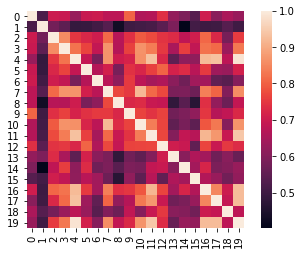

In [27]:
hm = sns.heatmap(csm, square = True) # use annot = csm to print the values on the heatmap
fig = hm.get_figure()

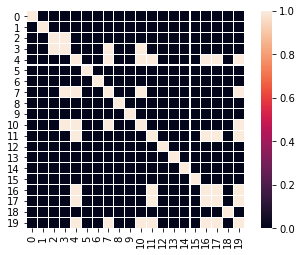

In [31]:
# With threshold
thresh = 0.85
hm = sns.heatmap(csm > thresh, square = True, linewidth = 0.1) # use annot = csm to print the values on the heatmap
fig = hm.get_figure()